In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
test = pd.read_csv('titanic_test.csv')

In [88]:
train.shape

(891, 12)

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
titanic = pd.concat([train,test], axis=0)

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

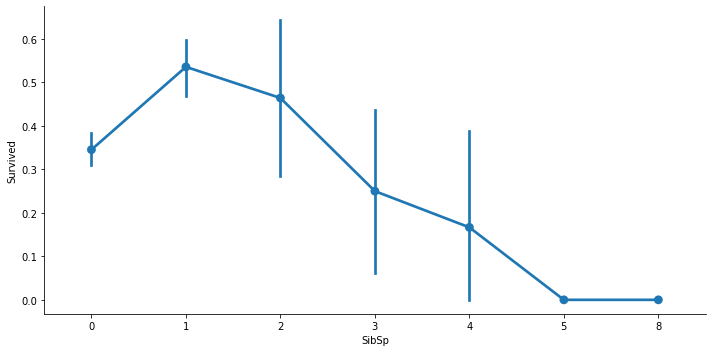

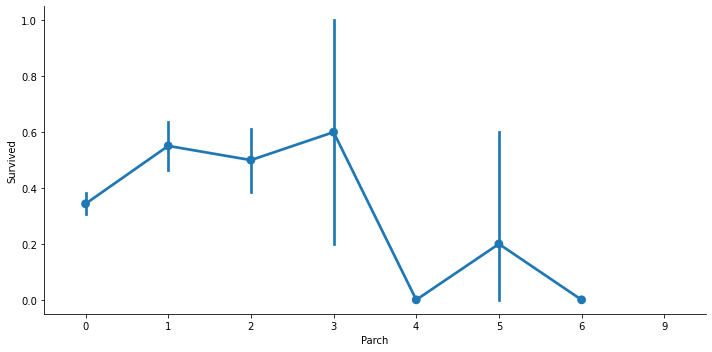

In [9]:
for i, col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

In [10]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [11]:
titanic.drop(['SibSp','Parch','PassengerId'], axis=1, inplace=True)

In [12]:
titanic.isnull().sum()

Survived       418
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
Family_cnt       0
dtype: int64

In [17]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [18]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [19]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [20]:
gender_num = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt,Cabin_ind
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0.0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


In [59]:
titles = []

In [60]:
for name in (titanic['Name']):
    sep = name.split(',')[1]
    stg = str(sep)
    titl = stg.split('.')[0]
    titles.append(titl)

In [61]:
titanic['titles'] = np.array(titles)

In [83]:
titanic.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

In [84]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_cnt,Cabin_ind,titles
0,0.0,3,0,22.0,7.2500,S,1,0,Mr
1,1.0,1,1,38.0,71.2833,C,1,1,Mrs
2,1.0,3,1,26.0,7.9250,S,0,0,Miss
3,1.0,1,1,35.0,53.1000,S,1,1,Mrs
4,0.0,3,0,35.0,8.0500,S,0,0,Mr


In [89]:
train_cleaned = titanic[:891]
test_cleaned = titanic[891:]

In [92]:
test_cleaned.drop(['Survived'], axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [94]:
test_cleaned.head()

,Pclass,Sex,Age,Fare,Embarked,Family_cnt,Cabin_ind,titles
0,3,0,34.5,7.8292,Q,0,0,Mr
1,3,1,47.0,7.0000,S,1,0,Mrs
2,2,0,62.0,9.6875,Q,0,0,Mr
3,3,0,27.0,8.6625,S,0,0,Mr
4,3,1,22.0,12.2875,S,2,0,Mrs


In [96]:
sns.set_style('darkgrid')

In [108]:
train = train_cleaned.drop(['Embarked','titles'],axis=1)
test = test_cleaned.drop(['Embarked','titles'], axis=1)

In [109]:
X = train.drop(['Survived'], axis=1)
y= train['Survived']

In [164]:
train.to_csv('titanic_cleaned.csv',index=False)

In [163]:
test.to_csv('test_cleaned.csv', index=False)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.4)

In [112]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [148]:
features_df = pd.concat([X_train, X_val], axis=0)
labels_df = pd.concat([y_train, y_val], axis=0)

In [118]:
from sklearn.linear_model import LogisticRegression

In [130]:
import joblib
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [131]:
def print_result(results):
    print('BEST PARAM: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std *2,3), params))

In [136]:
#Logistic Regression
lr = LogisticRegression()

parameters = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'max_iter':[100,1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(features_df, labels_df.values.ravel())

print_result(cv)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BEST PARAM: {'C': 10, 'max_iter': 100}

0.663 (+/-0.031) for {'C': 0.001, 'max_iter': 100}
0.663 (+/-0.031) for {'C': 0.001, 'max_iter': 1000}
0.73 (+/-0.055) for {'C': 0.01, 'max_iter': 100}
0.73 (+/-0.055) for {'C': 0.01, 'max_iter': 1000}
0.784 (+/-0.095) for {'C': 0.1, 'max_iter': 100}
0.784 (+/-0.095) for {'C': 0.1, 'max_iter': 1000}
0.791 (+/-0.088) for {'C': 1, 'max_iter': 100}
0.791 (+/-0.088) for {'C': 1, 'max_iter': 1000}
0.794 (+/-0.082) for {'C': 10, 'max_iter': 100}
0.794 (+/-0.082) for {'C': 10, 'max_iter': 1000}
0.794 (+/-0.082) for {'C': 100, 'max_iter': 100}
0.794 (+/-0.082) for {'C': 100, 'max_iter': 1000}
0.794 (+/-0.082) for {'C': 1000, 'max_iter': 100}
0.794 (+/-0.082) for {'C': 1000, 'max_iter': 1000}


In [137]:
cv.best_estimator_

LogisticRegression(C=10)

In [141]:
filename='LR_model.pkl'

In [142]:
joblib.dump(cv.best_estimator_,  open(filename,'wb'))

In [143]:
# SVM
from sklearn.svm import SVC

SVC()

SVC()

In [150]:
svc = SVC()

parameters = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf']
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(features_df,labels_df.values.ravel())

print_result(cv)

BEST PARAM: {'C': 0.1, 'kernel': 'linear'}

0.781 (+/-0.084) for {'C': 0.1, 'kernel': 'linear'}
0.663 (+/-0.035) for {'C': 0.1, 'kernel': 'rbf'}
0.781 (+/-0.084) for {'C': 1, 'kernel': 'linear'}
0.663 (+/-0.041) for {'C': 1, 'kernel': 'rbf'}
0.781 (+/-0.084) for {'C': 10, 'kernel': 'linear'}
0.701 (+/-0.084) for {'C': 10, 'kernel': 'rbf'}


In [151]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

In [152]:
filename='SVM_model.pkl'
joblib.dump(cv.best_estimator_, open(filename,'wb'))

In [154]:
# MultiLayer Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor

print(MLPClassifier())
print(MLPRegressor())

MLPClassifier()
MLPRegressor()


In [157]:
mlp = MLPClassifier()

parameters = {
    'hidden_layer_sizes':[(10,), (50,), (100,)],
    'activation': ['relu','tanh','logistic'],
    'learning_rate': ['constant', 'invscaling','adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(features_df, labels_df.values.ravel())

print_result(cv)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

BEST PARAM: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}

0.743 (+/-0.095) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.73 (+/-0.06) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.737 (+/-0.075) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.789 (+/-0.058) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.768 (+/-0.055) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.792 (+/-0.037) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.782 (+/-0.072) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.788 (+/-0.073) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.795 (+/-0.063) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

In [158]:
cv.best_estimator_

MLPClassifier(learning_rate='adaptive')

In [159]:
filename = 'MLP_model.pkl'
joblib.dump(cv.best_estimator_, open(filename, 'wb'))